In [1]:
import pandas as pd
import numpy as np

In [2]:
all_fights = pd.read_csv('Data Sets/Merged_Fights_Fighters.csv')
all_fights.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
all_fights.tail(10)

,event_place,f1result,f2result,f1fid,f2fid,method,method_d,ref,f1name,f1nick,...,f2nick,f2height,f2weight,f2association,f2class,f2locality,f2country,f1age,f2age,match_time
3559,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,58065,1326,Decision,Unanimous,Keith Peterson,Dennis Bermudez,The Menace,...,Crusher,67.0,145.0,T-Blood,Featherweight,"Inashiki, Ibaraki",Japan,30.0,38.0,15.000000
3560,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,17224,2765,TKO,Knees,Mario Yamasaki,Chris Camozzi,None,...,Diesel,72.0,170.0,MMA Lab,Welterweight,"Phoenix, Arizona",United States,30.0,34.0,0.433333
3561,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,31766,34625,Decision,Unanimous,Keith Peterson,James Krause,The James Krause,...,Shaolin,72.0,155.0,Toshido Mixed Martial Arts,Lightweight,"Kelowna, British Columbia",Canada,30.0,28.0,15.000000
3562,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,30452,54124,TKO,Punches,Bill Bookwalter,Sean Strickland,Tarzan,...,The Dominican Nightmare,69.0,171.0,Tristar Gym,Welterweight,"Montreal, Quebec",Canada,25.0,29.0,14.416667
3563,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,103153,17665,KO,Head Kick and Punches,James Chappell,Oluwale Bamgbose,The Holy War Angel,...,None,69.0,185.0,Power MMA,Middleweight,"Sao Paulo, Sao Paulo",Brazil,29.0,34.0,1.000000
3564,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,29470,14971,Decision,Unanimous,Chip Snider,Anthony Smith,Lionheart,...,Leleco,72.0,185.0,MMA Masters,Middleweight,"Salvador, Bahia",Brazil,28.0,34.0,15.000000
3565,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,25412,81634,Decision,Unanimous,Keith Peterson,Nathan Coy,Soulforce,...,Spyder,69.0,170.0,Renzo Gracie Philly,Welterweight,"Marlton, New Jersey",United States,38.0,27.0,15.000000
3566,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,75021,61266,Decision,Split,James Chappell,Ashlee Evans-Smith,None,...,The Bruiser,66.0,135.0,Elite Team,Bantamweight,"Visalia, California",United States,29.0,39.0,15.000000
3567,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,66725,117453,TKO,Elbows and Punches,Bill Bookwalter,Lauren Murphy,None,...,None,68.0,145.0,Nor-Cal Fighting Alliance,Featherweight,"Santa Rosa, California",United States,33.0,30.0,14.916667
3568,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,26808,58947,Decision,Unanimous,Chip Snider,Shamil Abdurakhimov,Abrek,...,Freight Train,77.0,253.0,Jackson-Wink MMA,Heavyweight,"Seattle, Washington",United States,35.0,36.0,15.000000


In [4]:
#mask to remove contested fights
mask_no_contest_1 = ((all_fights.method != 'No Contest - Hoffman Failed Drug Test') & 
                   (all_fights.method != 'No Contest - Overturned by State Commission') &
                    (all_fights.method != 'No') & (all_fights.method != "NC") & 
                    (all_fights.method != 'No Contest - Caceres Failed Drug Test') & 
                     (all_fights.method != 'No Contest - Overturned by Commission' ) & 
                     (all_fights.method !='No Contest') & (all_fights.method != 'Draw'))
# df_contested fights
fights = all_fights[mask_no_contest_1]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
fights_by_class = fights.groupby(['f1class'])['method'].count()
fights_by_class = pd.DataFrame(fights_by_class)
fights_by_class = fights_by_class.reset_index()
fights_by_class.head()

,f1class,method
0,Atomweight,1
1,Bantamweight,264
2,Featherweight,347
3,Flyweight,125
4,Heavyweight,403


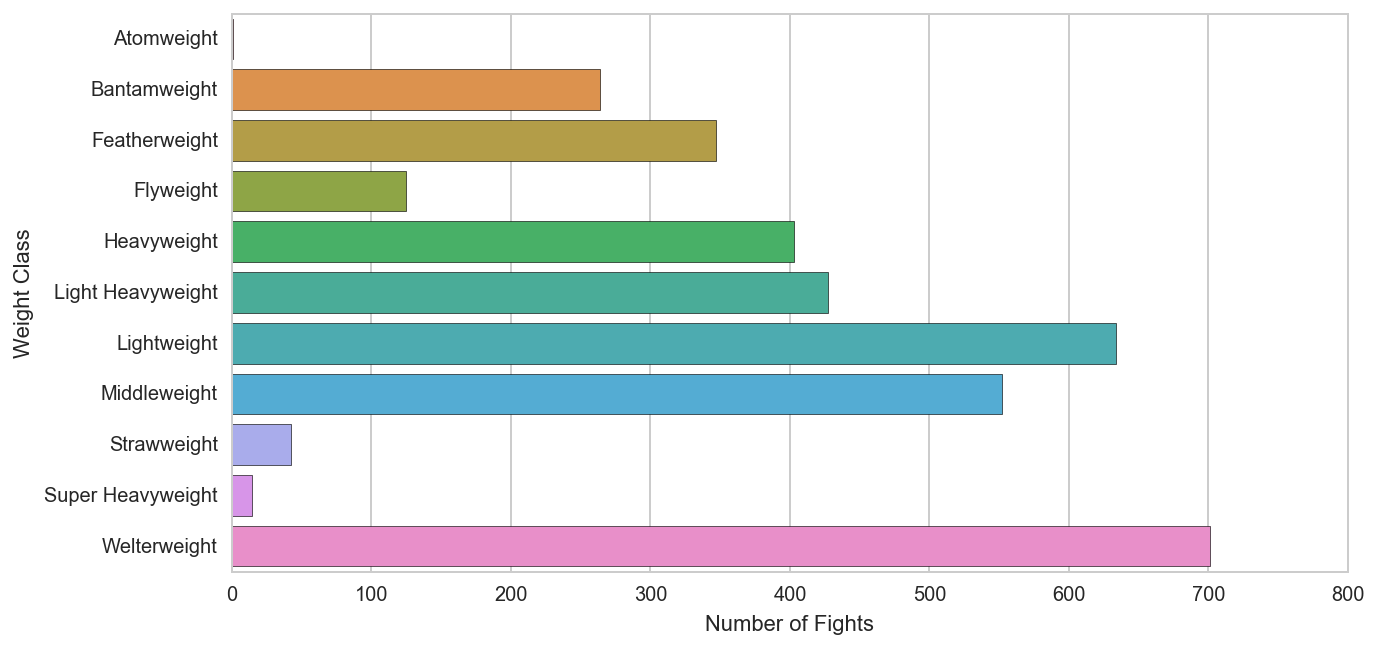

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'method', y = 'f1class', data = fights_by_class)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Weight Class')

In [8]:
fights_by_dec = fights.groupby(['method'])['f1result'].count()
fights_by_dec = pd.DataFrame(fights_by_dec)
fights_by_dec = fights_by_dec.reset_index()
fights_by_dec.head()

,method,f1result
0,DQ,11
1,Decision,1470
2,KO,414
3,Submission,768
4,TKO,847


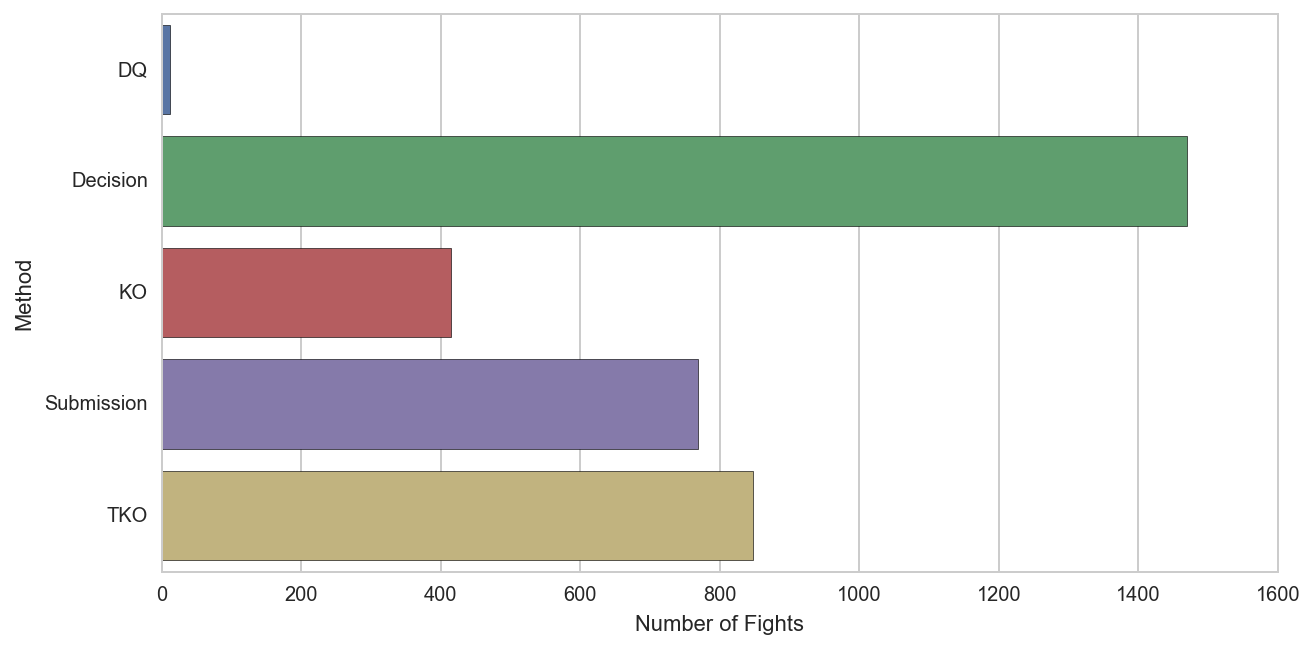

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'f1result', y = 'method', data = fights_by_dec)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Method')

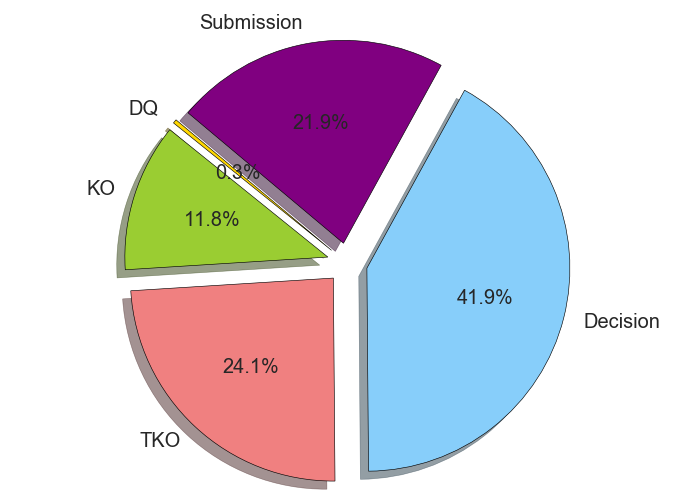

In [10]:
# Data to plot
labels = 'DQ', 'KO', 'TKO', 'Decision', 'Submission'
sizes = [11, 414, 847, 1470, 768]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [11]:
fights.columns

Index([u'event_place', u'f1result', u'f2result', u'f1fid', u'f2fid', u'method',
       u'method_d', u'ref', u'f1name', u'f1nick', u'f1height', u'f1weight',
       u'f1association', u'f1class', u'f1locality', u'f1country', u'f2name',
       u'f2nick', u'f2height', u'f2weight', u'f2association', u'f2class',
       u'f2locality', u'f2country', u'f1age', u'f2age', u'match_time'],
      dtype='object')

In [12]:
method_code = []
for method in fights['method']:
    if method == 'Decision':
        x = 0
    elif method == 'TKO':
        x = 1
    elif method == 'Submission':
        x = 2
    elif method == 'KO':
        x = 3
    elif method == 'DQ':
        x = 4
    method_code.append(x)


In [13]:
fights['method_code'] = method_code
fights['method_code'].value_counts()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    1470
1     847
2     768
3     414
4      11
Name: method_code, dtype: int64

In [14]:
#Starting my models
import statsmodels.formula.api as smf
import patsy
formula = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
Y,X = patsy.dmatrices(formula, data=fights, return_type = "dataframe")
y = np.ravel(Y)
print X.shape
print y.shape

(3510, 5299)
(3510,)


In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV()
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.svm import SVC
svc = SVC()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# lrcv.fit(X, y)

In [19]:
# lrcv.score(X,y)

In [20]:
lrcv_scores = cross_val_score(lrcv,X,y,cv=5)
print lrcv_scores
print np.mean(lrcv_scores)

[ 0.61363636  0.66145092  0.64529915  0.62624822  0.62857143]
0.63504121579


In [21]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Cs = 1.0/np.logspace(-1,4,20)

search_parameters_lr = {
    'penalty': ['l1','l2'],
    'C': Cs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'n_jobs': [4]
    }

lr_est = GridSearchCV(lr, search_parameters_lr, cv=5)

In [22]:
lr_grid = lr_est.fit(X,y)
print lr_grid.best_params_
print lr_grid.best_score_


{'penalty': 'l1', 'C': 0.042813323987193959, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.636752136752


In [60]:
lr_best = LogisticRegression(penalty= 'l1', C= 0.042813323987193959, n_jobs = 4, solver= 'liblinear', class_weight= None)

In [62]:
lr_best.fit(X,y)

LogisticRegression(C=0.0428133239872, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=4, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

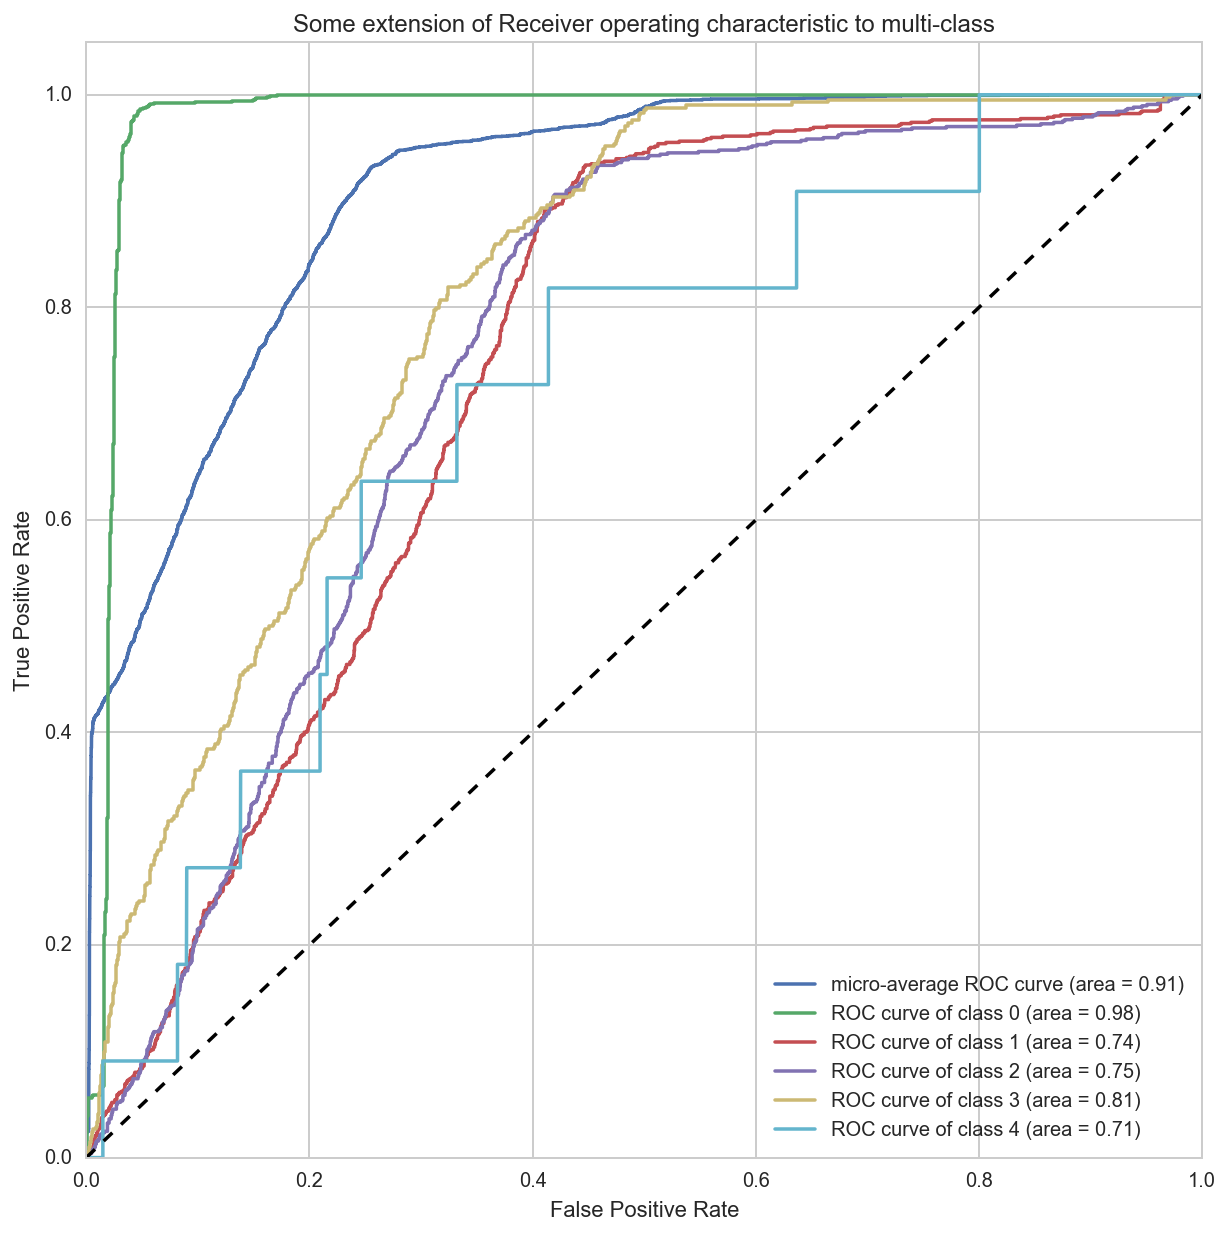

In [63]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
class multi_roc:
    
    # model / estimator
    estimator = False
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, filter_class=False, figsize=(10,10)):
        _ = ""
        
        y_score = self.estimator.decision_function(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
        # Plot ROC curve
        plt.figure(figsize=figsize)
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))
        
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(i, roc_auc[i]))
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Some extension of Receiver operating characteristic to multi-class')
        plt.legend(loc="lower right")
        plt.show()

        


roc = multi_roc(estimator = lr_best)
roc.plot(X, y, figsize=(10,10))

In [70]:
y_pred_lr = lr_best.predict(X)

In [71]:
print classification_report(y, y_pred_lr)

             precision    recall  f1-score   support

        0.0       0.85      0.99      0.92      1470
        1.0       0.45      0.54      0.49       847
        2.0       0.44      0.45      0.44       768
        3.0       0.00      0.00      0.00       414
        4.0       0.00      0.00      0.00        11

avg / total       0.56      0.64      0.60      3510



In [26]:
sgdc.fit(X_train,y_train)
sgdc.score(X_test,y_test)

0.56600517687661778

In [27]:
sgdc_scores = cross_val_score(sgdc,X,y,cv=10)
print sgdc_scores
print np.mean(sgdc_scores)

[ 0.56657224  0.625       0.61931818  0.61363636  0.45584046  0.55270655
  0.46153846  0.46571429  0.42979943  0.58739255]
0.537751851629


In [28]:

#l1_ratio = np.logspace(-5,1, 20)

search_parameters_sgdc = {
    'loss': ['log'],
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'l1_ratio': [0,.25,.5,.75,1],
    'n_iter': [1,2,3,4,5],
    'shuffle': [True, False]
    }

sgdc_est = GridSearchCV(sgdc, search_parameters_sgdc, cv=5)

In [29]:
sgdc_grid = sgdc_est.fit(X,y)
print sgdc_grid.best_params_
print sgdc_grid.best_score_

{'penalty': 'l1', 'l1_ratio': 0.25, 'n_iter': 5, 'shuffle': True, 'loss': 'log'}
0.638746438746


In [72]:
sgdc_best = SGDClassifier(penalty = 'l1', l1_ratio= 0.25, n_iter =  5, shuffle =  True, loss =  'log')

In [74]:
sgdc_best.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.25,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

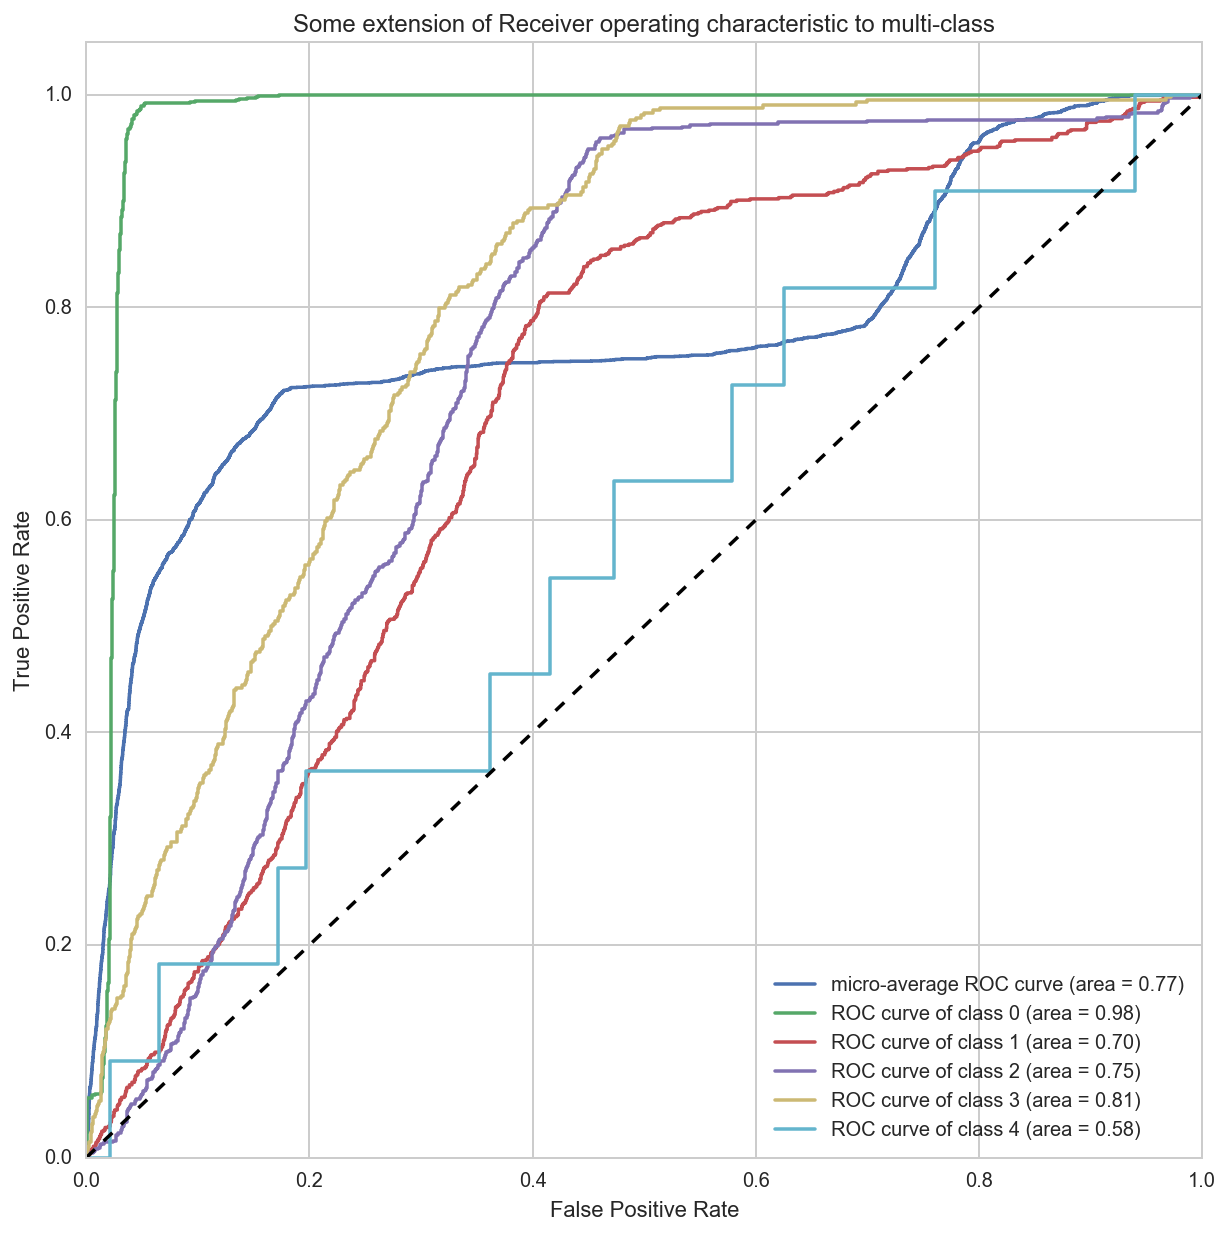

In [75]:
roc = multi_roc(estimator = sgdc_best)
roc.plot(X, y, figsize=(10,10))

In [31]:
knn_scores = cross_val_score(knn,X,y,cv=10)
print knn_scores
print np.mean(knn_scores)

[ 0.58073654  0.62215909  0.64488636  0.63920455  0.62962963  0.65527066
  0.64102564  0.62285714  0.6217765   0.60744986]
0.626499597372


In [80]:
from sklearn.grid_search import GridSearchCV

search_parameters_knn = {
    
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'],
    'leaf_size': [5, 10, 20],
    'n_neighbors': [1, 5, 6],
    'n_jobs': [4],
    'p': [2],
    'metric': ['minkowski']
    }

knn_est = GridSearchCV(knn, search_parameters_knn, cv=5)

In [81]:
knn_grid = knn_est.fit(X,y)
print knn_grid.best_params_
print knn_grid.best_score_

{'n_neighbors': 5, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 10}
0.614814814815


In [84]:
knn_best = KNeighborsClassifier(weights = 'uniform' , algorithm = 'auto', leaf_size = 10 , n_neighbors = 5 , n_jobs = 4, p = 2,  metric = 'minkowski')

In [85]:
knn_best.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
knn_grid.score(X,y)

0.73988603988603985

In [66]:
y_pred_knn = knn_grid.predict(X)

In [67]:
print classification_report(y, y_pred_knn)

             precision    recall  f1-score   support

        0.0       0.88      0.99      0.93      1470
        1.0       0.58      0.67      0.62       847
        2.0       0.64      0.57      0.61       768
        3.0       0.66      0.31      0.42       414
        4.0       0.00      0.00      0.00        11

avg / total       0.73      0.74      0.72      3510



In [38]:
# DTC.fit(X_train, y_train)

In [39]:
dtc_scores = cross_val_score(DTC,X,y,cv=10)
print dtc_scores
print np.mean(dtc_scores)

[ 0.58356941  0.63352273  0.62784091  0.65056818  0.65811966  0.64672365
  0.63247863  0.67714286  0.68481375  0.63323782]
0.642801759368


In [40]:
search_parameters_dtc = {
    
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }

dtc_est = GridSearchCV(DTC, search_parameters_dtc, cv=5)

In [41]:
dtc_grid = dtc_est.fit(X,y)
print dtc_grid.best_params_
print dtc_grid.best_score_

{'max_features': None, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 3}
0.67264957265


In [87]:
dtc_best = DecisionTreeClassifier(max_features= None, splitter ='best', criterion =  'entropy', max_depth = 3)
dtc_best.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [42]:
y_pred_dtc = dtc_grid.predict(X)

In [43]:
print classification_report(y, y_pred_dtc)

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      1470
        1.0       0.43      0.85      0.57       847
        2.0       0.54      0.20      0.29       768
        3.0       0.57      0.13      0.22       414
        4.0       0.00      0.00      0.00        11

avg / total       0.71      0.68      0.64      3510



In [89]:
bag_knn = BaggingClassifier(knn_best)
bag_dtc = BaggingClassifier(dtc_best)

In [90]:
bag_knn_scores = cross_val_score(bag_knn,X,y,cv=10)
bag_dtc_scores = cross_val_score(bag_dtc,X,y,cv=10)
print np.mean(bag_knn_scores)
print np.mean(bag_dtc_scores)

0.61511157312
0.66556388629


In [46]:
search_parameters_bag = {
    'base_estimator':[knn_best, dtc_best], 
    'n_estimators':[8,10,12,50],
    'max_samples': [.25, .5, .75, 1],
    'max_features': [25, .5, .75, 1],
    'n_jobs': [4]
}

bag_est = GridSearchCV(bag, search_parameters_bag, cv=5)

In [47]:
bag_grid = bag_est.fit(X,y)
print bag_grid.best_params_
print bag_grid.best_score_

/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, wh

JoblibAttributeError: JoblibAttributeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1006d8ab0, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/mikes...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1006d8ab0, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/mikes...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    591         
    592         If a global instance already exists, this reinitializes and starts it
    593         """
    594         app = cls.instance(**kwargs)
    595         app.initialize(argv)
--> 596         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    597 
    598 #-----------------------------------------------------------------------------
    599 # utility functions, for convenience
    600 #-----------------------------------------------------------------------------

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    437         
    438         if self.poller is not None:
    439             self.poller.start()
    440         self.kernel.start()
    441         try:
--> 442             ioloop.IOLoop.instance().start()
    443         except KeyboardInterrupt:
    444             pass
    445 
    446 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    878                 self._events.update(event_pairs)
    879                 while self._events:
    880                     fd, events = self._events.popitem()
    881                     try:
    882                         fd_obj, handler_func = self._handlers[fd]
--> 883                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 5
    884                     except (OSError, IOError) as e:
    885                         if errno_from_exception(e) == errno.EPIPE:
    886                             # Happens when the client closes the connection
    887                             pass

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 5), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 5)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=5)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-23T23:39:36.989018', 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'session': '4F6D388E32BF4064860A34712A349718', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['4F6D388E32BF4064860A34712A349718']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-23T23:39:36.989018', 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'session': '4F6D388E32BF4064860A34712A349718', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['4F6D388E32BF4064860A34712A349718'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-06-23T23:39:36.989018', 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'session': '4F6D388E32BF4064860A34712A349718', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'D6170450A46B4E8880D2766CBF38B06A', 'msg_type': 'execute_request', 'parent_header': {}})
    386         if not silent:
    387             self.execution_count += 1
    388             self._publish_execute_input(code, parent, self.execution_count)
    389 
    390         reply_content = self.do_execute(code, silent, store_history,
--> 391                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    392 
    393         # Flush output before sending the reply.
    394         sys.stdout.flush()
    395         sys.stderr.flush()

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    194 
    195         reply_content = {}
    196         # FIXME: the shell calls the exception handler itself.
    197         shell._reply_content = None
    198         try:
--> 199             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_'
        store_history = True
        silent = False
    200         except:
    201             status = u'error'
    202             # FIXME: this code right now isn't being used yet by default,
    203             # because the run_cell() call above directly fires off exception

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'bag_grid = bag_est.fit(X,y)\nprint bag_grid.best_params_\nprint bag_grid.best_score_', store_history=True, silent=False, shell_futures=True)
   2718                 self.displayhook.exec_result = result
   2719 
   2720                 # Execute the user code
   2721                 interactivity = "none" if silent else self.ast_node_interactivity
   2722                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2723                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2724 
   2725                 # Reset this so later displayed values do not modify the
   2726                 # ExecutionResult
   2727                 self.displayhook.exec_result = None

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Print object>, <_ast.Print object>], cell_name='<ipython-input-47-99ac77bc716d>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2820 
   2821         try:
   2822             for i, node in enumerate(to_run_exec):
   2823                 mod = ast.Module([node])
   2824                 code = compiler(mod, cell_name, "exec")
-> 2825                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x132864e30, file "<ipython-input-47-99ac77bc716d>", line 1>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   2826                     return True
   2827 
   2828             for i, node in enumerate(to_run_interactive):
   2829                 mod = ast.Interactive([node])

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x132864e30, file "<ipython-input-47-99ac77bc716d>", line 1>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2880         outflag = 1  # happens in more places, so it's easier as default
   2881         try:
   2882             try:
   2883                 self.hooks.pre_run_code_hook()
   2884                 #rprint('Running code', repr(code_obj)) # dbg
-> 2885                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x132864e30, file "<ipython-input-47-99ac77bc716d>", line 1>
        self.user_global_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'Cs': array([  1.00000000e+01,   5.45559478e+00,   2.9...e-04,
         1.83298071e-04,   1.00000000e-04]), 'DTC': DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'import pandas as pd\nimport numpy as np', u"all_fights = pd.read_csv('Data Sets/Merged_Fig...ights.drop(['Unnamed: 0'], axis=1, inplace=True)", u'all_fights.tail(10)', u'#mask to remove contested fights\nmask_no_cont...d fights\nfights = all_fights[mask_no_contest_1]', u'import matplotlib.pyplot as plt\nimport seabor...onfig InlineBackend.figure_format = \'retina\'")', u"fights_by_class = fights.groupby(['f1class'])[...s_by_class.reset_index()\nfights_by_class.head()", u"plt.figure(figsize = (10,5))\nsns.barplot(x = ...l = 'Number of Fights', ylabel = 'Weight Class')", u"fights_by_dec = fights.groupby(['method'])['f1...ights_by_dec.reset_index()\nfights_by_dec.head()", u"plt.figure(figsize = (10,5))\nsns.barplot(x = ...(xlabel = 'Number of Fights', ylabel = 'Method')", u"# Data to plot\nlabels = 'DQ', 'KO', 'TKO', 'D...tartangle=140)\n \nplt.axis('equal')\nplt.show()", u'fights.columns', u"method_code = []\nfor method in fights['method... 'DQ':\n        x = 4\n    method_code.append(x)", u"fights['method_code'] = method_code\nfights['method_code'].value_counts()", u'#Starting my models\nimport statsmodels.formul...)\ny = np.ravel(Y)\nprint X.shape\nprint y.shape', u'from sklearn.cross_validation import train_tes... y_test = train_test_split(X, y, test_size=0.33)', u'from sklearn.linear_model import LogisticRegre...fier()\nfrom sklearn.svm import SVC\nsvc = SVC()', u'from sklearn.metrics import classification_report, confusion_matrix', u'# lrcv.fit(X, y)', u'# lrcv.score(X,y)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {3:                                             even...6667  
3568   15.000000  

[10 rows x 27 columns], 6:          f1class  method
0     Atomweight       ...3      Flyweight     128
4    Heavyweight     394, 8:        method  f1result
0          DQ        11
...4
3  Submission       768
4         TKO       847, 11: Index([u'event_place', u'f1result', u'f2result',..., u'f2age', u'match_time'],
      dtype='object'), 13: 0    1470
1     847
2     768
3     414
4      11
Name: method_code, dtype: int64, 26: 0.56600517687661778, 35: 0.73988603988603985}, ...}
        self.user_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'Cs': array([  1.00000000e+01,   5.45559478e+00,   2.9...e-04,
         1.83298071e-04,   1.00000000e-04]), 'DTC': DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'import pandas as pd\nimport numpy as np', u"all_fights = pd.read_csv('Data Sets/Merged_Fig...ights.drop(['Unnamed: 0'], axis=1, inplace=True)", u'all_fights.tail(10)', u'#mask to remove contested fights\nmask_no_cont...d fights\nfights = all_fights[mask_no_contest_1]', u'import matplotlib.pyplot as plt\nimport seabor...onfig InlineBackend.figure_format = \'retina\'")', u"fights_by_class = fights.groupby(['f1class'])[...s_by_class.reset_index()\nfights_by_class.head()", u"plt.figure(figsize = (10,5))\nsns.barplot(x = ...l = 'Number of Fights', ylabel = 'Weight Class')", u"fights_by_dec = fights.groupby(['method'])['f1...ights_by_dec.reset_index()\nfights_by_dec.head()", u"plt.figure(figsize = (10,5))\nsns.barplot(x = ...(xlabel = 'Number of Fights', ylabel = 'Method')", u"# Data to plot\nlabels = 'DQ', 'KO', 'TKO', 'D...tartangle=140)\n \nplt.axis('equal')\nplt.show()", u'fights.columns', u"method_code = []\nfor method in fights['method... 'DQ':\n        x = 4\n    method_code.append(x)", u"fights['method_code'] = method_code\nfights['method_code'].value_counts()", u'#Starting my models\nimport statsmodels.formul...)\ny = np.ravel(Y)\nprint X.shape\nprint y.shape', u'from sklearn.cross_validation import train_tes... y_test = train_test_split(X, y, test_size=0.33)', u'from sklearn.linear_model import LogisticRegre...fier()\nfrom sklearn.svm import SVC\nsvc = SVC()', u'from sklearn.metrics import classification_report, confusion_matrix', u'# lrcv.fit(X, y)', u'# lrcv.score(X,y)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {3:                                             even...6667  
3568   15.000000  

[10 rows x 27 columns], 6:          f1class  method
0     Atomweight       ...3      Flyweight     128
4    Heavyweight     394, 8:        method  f1result
0          DQ        11
...4
3  Submission       768
4         TKO       847, 11: Index([u'event_place', u'f1result', u'f2result',..., u'f2age', u'match_time'],
      dtype='object'), 13: 0    1470
1     847
2     768
3     414
4      11
Name: method_code, dtype: int64, 26: 0.56600517687661778, 35: 0.73988603988603985}, ...}
   2886             finally:
   2887                 # Reset our crash handler in place
   2888                 sys.excepthook = old_excepthook
   2889         except SystemExit as e:

...........................................................................
/Users/mikesanders/Desktop/DSI-SF-1-msanders2288/Final Project/<ipython-input-47-99ac77bc716d> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 bag_grid = bag_est.fit(X,y)
      7 print bag_grid.best_params_
      8 print bag_grid.best_score_
      9 
     10 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), X=      C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns], y=array([ 2.,  2.,  2., ...,  0.,  1.,  0.]))
    799         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    800             Target relative to X for classification or regression;
    801             None for unsupervised learning.
    802 
    803         """
--> 804         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X =       C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns]
        y = array([ 2.,  2.,  2., ...,  0.,  1.,  0.])
        self.param_grid = {'base_estimator': [GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0)], 'max_features': [25, 0.5, 0.75, 1], 'max_samples': [0.25, 0.5, 0.75, 1], 'n_estimators': [8, 10, 12, 50], 'n_jobs': [4]}
    805 
    806 
    807 class RandomizedSearchCV(BaseSearchCV):
    808     """Randomized search on hyper parameters.

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), X=      C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns], y=array([ 2.,  2.,  2., ...,  0.,  1.,  0.]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    548         )(
    549             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    550                                     train, test, self.verbose, parameters,
    551                                     self.fit_params, return_parameters=True,
    552                                     error_score=self.error_score)
--> 553                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    554                 for train, test in cv)
    555 
    556         # Out is a list of triplet: score, estimator, n_test_samples
    557         n_fits = len(out)

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object <genexpr>>)
    795         self._smoothed_batch_duration = 0.0
    796         try:
    797             # Only set self._iterating to True if at least a batch
    798             # was dispatched. In particular this covers the edge
    799             # case of Parallel used with an exhausted iterator.
--> 800             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object <genexpr>>
    801                 self._iterating = True
    802             else:
    803                 self._iterating = False
    804 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object <genexpr>>)
    653             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    654             if not tasks:
    655                 # No more tasks available in the iterator: tell caller to stop.
    656                 return False
    657             else:
--> 658                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    659                 return True
    660 
    661     def _print(self, msg, msg_args):
    662         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    561         # If job.get() catches an exception, it closes the queue:
    562         if self._aborting:
    563             return
    564 
    565         if self._pool is None:
--> 566             job = ImmediateComputeBatch(batch)
        job = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    567             self._jobs.append(job)
    568             self.n_dispatched_batches += 1
    569             self.n_dispatched_tasks += len(batch)
    570             self.n_completed_tasks += len(batch)

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __init__(self=<sklearn.externals.joblib.parallel.ImmediateComputeBatch object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    175 
    176     """
    177     def __init__(self, batch):
    178         # Don't delay the application, to avoid keeping the input
    179         # arguments in memory
--> 180         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    181 
    182     def get(self):
    183         return self.results
    184 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False),       C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns], array([ 2.,  2.,  2., ...,  0.,  1.,  0.]), <function _passthrough_scorer>, array([ 445,  446,  454, ..., 3507, 3508, 3509]), array([   0,    1,    2,    3,    4,    5,    6,... 1023, 1025, 1027, 1035, 1036, 1037, 1038, 1039]), 0, {'base_estimator': GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), 'max_features': 25, 'max_samples': 0.25, 'n_estimators': 8, 'n_jobs': 4}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
        self.items = [(<function _fit_and_score>, (BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False),       C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns], array([ 2.,  2.,  2., ...,  0.,  1.,  0.]), <function _passthrough_scorer>, array([ 445,  446,  454, ..., 3507, 3508, 3509]), array([   0,    1,    2,    3,    4,    5,    6,... 1023, 1025, 1027, 1035, 1036, 1037, 1038, 1039]), 0, {'base_estimator': GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), 'max_features': 25, 'max_samples': 0.25, 'n_estimators': 8, 'n_jobs': 4}, {}), {'error_score': 'raise', 'return_parameters': True})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), X=      C(event_place)[1stBank Center, Broomfield,...  
3568  253.000000  

[3510 rows x 5299 columns], y=array([ 2.,  2.,  2., ...,  0.,  1.,  0.]), scorer=<function _passthrough_scorer>, train=array([ 445,  446,  454, ..., 3507, 3508, 3509]), test=array([   0,    1,    2,    3,    4,    5,    6,... 1023, 1025, 1027, 1035, 1036, 1037, 1038, 1039]), verbose=0, parameters={'base_estimator': GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), 'max_features': 25, 'max_samples': 0.25, 'n_estimators': 8, 'n_jobs': 4}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1545                              " numeric value. (Hint: if using 'raise', please"
   1546                              " make sure that it has been spelled correctly.)"
   1547                              )
   1548 
   1549     else:
-> 1550         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False)
        X_test =       C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns]
        y_test = array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])
        scorer = <function _passthrough_scorer>
   1551         if return_train_score:
   1552             train_score = _score(estimator, X_train, y_train, scorer)
   1553 
   1554     scoring_time = time.time() - start_time

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py in _score(estimator=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), X_test=      C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns], y_test=array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.]), scorer=<function _passthrough_scorer>)
   1601 def _score(estimator, X_test, y_test, scorer):
   1602     """Compute the score of an estimator on a given test set."""
   1603     if y_test is None:
   1604         score = scorer(estimator, X_test)
   1605     else:
-> 1606         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = <function _passthrough_scorer>
        estimator = BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False)
        X_test =       C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns]
        y_test = array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])
   1607     if not isinstance(score, numbers.Number):
   1608         raise ValueError("scoring must return a number, got %s (%s) instead."
   1609                          % (str(score), type(score)))
   1610     return score

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py in _passthrough_scorer(estimator=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), *args=(      C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns], array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])), **kwargs={})
    200     return scorer
    201 
    202 
    203 def _passthrough_scorer(estimator, *args, **kwargs):
    204     """Function that wraps estimator.score"""
--> 205     return estimator.score(*args, **kwargs)
        estimator.score = <bound method BaggingClassifier.score of Bagging... random_state=None, verbose=0, warm_start=False)>
        args = (      C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns], array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.]))
        kwargs = {}
    206 
    207 
    208 def check_scoring(estimator, scoring=None, allow_none=False):
    209     """Determine scorer from user options.

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/base.py in score(self=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), X=      C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns], y=array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.]), sample_weight=None)
    305         score : float
    306             Mean accuracy of self.predict(X) wrt. y.
    307 
    308         """
    309         from .metrics import accuracy_score
--> 310         return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
        accuracy_score = <function accuracy_score>
        y = array([ 2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  ...,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])
        self.predict = <bound method BaggingClassifier.predict of Baggi... random_state=None, verbose=0, warm_start=False)>
        X =       C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns]
        sample_weight = None
    311 
    312 
    313 ###############################################################################
    314 class RegressorMixin(object):

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/ensemble/bagging.py in predict(self=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), X=      C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns])
    570         Returns
    571         -------
    572         y : array of shape = [n_samples]
    573             The predicted classes.
    574         """
--> 575         predicted_probabilitiy = self.predict_proba(X)
        predicted_probabilitiy = undefined
        self.predict_proba = <bound method BaggingClassifier.predict_proba of... random_state=None, verbose=0, warm_start=False)>
        X =       C(event_place)[1stBank Center, Broomfield,...0  
1052  155.000000  

[704 rows x 5299 columns]
    576         return self.classes_.take((np.argmax(predicted_probabilitiy, axis=1)),
    577                                   axis=0)
    578 
    579     def predict_proba(self, X):

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/ensemble/bagging.py in predict_proba(self=BaggingClassifier(base_estimator=GridSearchCV(cv...  random_state=None, verbose=0, warm_start=False), X=array([[   0.,    0.,    0., ...,  176.,   77., ...[   0.,    0.,    0., ...,  171.,   73.,  155.]]))
    616             delayed(_parallel_predict_proba)(
    617                 self.estimators_[starts[i]:starts[i + 1]],
    618                 self.estimators_features_[starts[i]:starts[i + 1]],
    619                 X,
    620                 self.n_classes_)
--> 621             for i in range(n_jobs))
        n_jobs = 4
    622 
    623         # Reduce
    624         proba = sum(all_proba) / self.n_estimators
    625 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    805             if pre_dispatch == "all" or n_jobs == 1:
    806                 # The iterable was consumed all at once by the above for loop.
    807                 # No need to wait for async callbacks to trigger to
    808                 # consumption.
    809                 self._iterating = False
--> 810             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    811             # Make sure that we get a last message telling us we are done
    812             elapsed_time = time.time() - self._start_time
    813             self._print('Done %3i out of %3i | elapsed: %s finished',
    814                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
AttributeError                                     Thu Jun 23 23:40:43 2016
PID: 12034            Python 2.7.11: /Users/mikesanders/anaconda/bin/python
...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_predict_proba>
        args = ([GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0)], [array([4169, 2864,  789, 1313, 4855, 3535, 4136,...1332, 1871,  817, 1009,
       2677, 1133, 4468]), array([1975, 1042, 4570, 3523, 3371,  578,  721,...1806, 5066, 4217, 2528,
       3415, 4787, 3135])], memmap([[   0.,    0.,    0., ...,  176.,   77.,...[   0.,    0.,    0., ...,  171.,   73.,  155.]]), 5)
        kwargs = {}
        self.items = [(<function _parallel_predict_proba>, ([GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0)], [array([4169, 2864,  789, 1313, 4855, 3535, 4136,...1332, 1871,  817, 1009,
       2677, 1133, 4468]), array([1975, 1042, 4570, 3523, 3371,  578,  721,...1806, 5066, 4217, 2528,
       3415, 4787, 3135])], memmap([[   0.,    0.,    0., ...,  176.,   77.,...[   0.,    0.,    0., ...,  171.,   73.,  155.]]), 5), {})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/ensemble/bagging.py in _parallel_predict_proba(estimators=[GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0)], estimators_features=[array([4169, 2864,  789, 1313, 4855, 3535, 4136,...1332, 1871,  817, 1009,
       2677, 1133, 4468]), array([1975, 1042, 4570, 3523, 3371,  578,  721,...1806, 5066, 4217, 2528,
       3415, 4787, 3135])], X=memmap([[   0.,    0.,    0., ...,  176.,   77.,...[   0.,    0.,    0., ...,  171.,   73.,  155.]]), n_classes=5)
    141 
    142     for estimator, features in zip(estimators, estimators_features):
    143         if hasattr(estimator, "predict_proba"):
    144             proba_estimator = estimator.predict_proba(X[:, features])
    145 
--> 146             if n_classes == len(estimator.classes_):
        n_classes = 5
        estimator.classes_ = undefined
    147                 proba += proba_estimator
    148 
    149             else:
    150                 proba[:, estimator.classes_] += \

AttributeError: 'GridSearchCV' object has no attribute 'classes_'
___________________________________________________________________________

In [48]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.9906422798809017

In [49]:
rfc_scores = cross_val_score(rfc,X,y,cv=10)
print np.mean(rfc_scores)

0.610911834823


In [50]:
search_parameters_rfc = {
    'n_estimators': [10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }
rfc_est = GridSearchCV(rfc, search_parameters_rfc, cv=5)

In [51]:
rfc_grid = rfc_est.fit(X,y)
print rfc_grid.best_params_
print rfc_grid.best_score_

{'max_features': None, 'n_estimators': 20, 'criterion': 'entropy', 'max_depth': 5}
0.667806267806


In [52]:
y_pred_rfc = rfc_grid.predict(X)

In [53]:
print classification_report(y, y_pred_rfc)

             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00      1470
        1.0       0.50      0.64      0.56       847
        2.0       0.52      0.60      0.56       768
        3.0       0.63      0.15      0.25       414
        4.0       0.00      0.00      0.00        11

avg / total       0.73      0.72      0.70      3510



In [54]:
# svc.fit(X_train, y_train)
# svc.score(X_train, y_train)

In [55]:
search_parameters_SVC = {
    'kernel':['linear', 'rbf'], 
    'C':[3, 10, 13],
}

svc_est = GridSearchCV(svc, search_parameters_SVC, cv=5)

In [56]:
svc_grid = svc_est.fit(X,y)
print svc_grid.best_params_
print svc_grid.best_score_

{'kernel': 'rbf', 'C': 10}
0.639601139601


In [77]:
svc_best = SVC(kernel = 'rbf', C=10)

In [78]:
svc_best.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
roc = multi_roc(estimator = svc_best)
roc.plot(X, y, figsize=(10,10))

/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:547: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.18. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


ValueError: Found arrays with inconsistent numbers of samples: [17550 35100]

In [57]:
y_pred_svc = svc_grid.predict(X)

In [58]:
print classification_report(y, y_pred_svc)

             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94      1470
        1.0       0.45      0.58      0.51       847
        2.0       0.46      0.47      0.47       768
        3.0       1.00      0.01      0.01       414
        4.0       0.00      0.00      0.00        11

avg / total       0.70      0.66      0.62      3510



In [ ]:
# print np.logspace(-5,1, 20)

In [ ]:
# print np.logspace(0,1,20)